In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from publicsuffixlist import PublicSuffixList

psl = PublicSuffixList()

In [3]:
df_domains = pd.read_csv('data/mixed_domain.csv')
df_domains.head()

,DGA_family,Domain,Type
0,banjori,vrxhererwyatanb.com,DGA
1,banjori,rjdwmachuslazaroqok.com,DGA
2,none,mte.gov.br,Normal
3,none,animefangirl00.tumblr.com,Normal
4,none,seacenter.ir,Normal


In [4]:
df_domains['Domain'].isnull().sum()

0

Convert Type to Binary 1: DGA, 0: Normal

In [5]:
df_domains['Type'] = df_domains['Type'].apply(lambda x: 1 if x == 'DGA' else 0)
df_domains.head()

,DGA_family,Domain,Type
0,banjori,vrxhererwyatanb.com,1
1,banjori,rjdwmachuslazaroqok.com,1
2,none,mte.gov.br,0
3,none,animefangirl00.tumblr.com,0
4,none,seacenter.ir,0


Generate Domain Name Length **(DNL)** on dataset

In [6]:
df_domains['DNL'] = df_domains['Domain'].apply(lambda x: len(x))
df_domains.head()

,DGA_family,Domain,Type,DNL
0,banjori,vrxhererwyatanb.com,1,19
1,banjori,rjdwmachuslazaroqok.com,1,23
2,none,mte.gov.br,0,10
3,none,animefangirl00.tumblr.com,0,25
4,none,seacenter.ir,0,12


Generate Number of Subdomains **(NoS)** on dataset

In [7]:
df_domains['Nos'] = df_domains['Domain'].apply(lambda x: x.count('.'))
df_domains.head()

,DGA_family,Domain,Type,DNL,Nos
0,banjori,vrxhererwyatanb.com,1,19,1
1,banjori,rjdwmachuslazaroqok.com,1,23,1
2,none,mte.gov.br,0,10,2
3,none,animefangirl00.tumblr.com,0,25,2
4,none,seacenter.ir,0,12,1


Generate Subdomain Length Mean **(SLM)** on dataset

In [9]:
def calculateSLM(input):
    # Using psl to obtain the valid public suffix
    validPublicSuffix =  psl.publicsuffix(input)
   
    if len(validPublicSuffix) != 0:
         # If it has VPS
#         print(input, validPublicSuffix)
        subString = input[0: input.index(validPublicSuffix) - 1]  
    else:
        # If not
        subString = input
    
    result = (len(subString) - subString.count('.')) / (subString.count('.') + 1)
    
    return result

In [10]:
df_domains['SLM'] = df_domains['Domain'].apply(lambda x: calculateSLM(x))
df_domains.head()

,DGA_family,Domain,Type,DNL,Nos,SLM
0,banjori,vrxhererwyatanb.com,1,19,1,15.0
1,banjori,rjdwmachuslazaroqok.com,1,23,1,19.0
2,none,mte.gov.br,0,10,2,3.0
3,none,animefangirl00.tumblr.com,0,25,2,10.0
4,none,seacenter.ir,0,12,1,9.0


Generate Has www Prefix **(HwP)** 0 or 1

In [11]:
df_domains['HwP'] = df_domains['Domain'].apply(lambda x: 1 if x.split('.')[0] == 'www' else 0)
df_domains.head()

,DGA_family,Domain,Type,DNL,Nos,SLM,HwP
0,banjori,vrxhererwyatanb.com,1,19,1,15.0,0
1,banjori,rjdwmachuslazaroqok.com,1,23,1,19.0,0
2,none,mte.gov.br,0,10,2,3.0,0
3,none,animefangirl00.tumblr.com,0,25,2,10.0,0
4,none,seacenter.ir,0,12,1,9.0,0


Generate Has a Valid Top Level Domain **(HVTLD)** 0 or 1

In [12]:
# Load Valid Top Level Domains data
import sys

topLevelDomain = []
with open('data/tlds-alpha-by-domain.txt', 'r') as content:
    for line in content:
        topLevelDomain.append((line.strip('\n')))
        
print(topLevelDomain)

['AAA', 'AARP', 'ABARTH', 'ABB', 'ABBOTT', 'ABBVIE', 'ABC', 'ABLE', 'ABOGADO', 'ABUDHABI', 'AC', 'ACADEMY', 'ACCENTURE', 'ACCOUNTANT', 'ACCOUNTANTS', 'ACO', 'ACTIVE', 'ACTOR', 'AD', 'ADAC', 'ADS', 'ADULT', 'AE', 'AEG', 'AERO', 'AETNA', 'AF', 'AFAMILYCOMPANY', 'AFL', 'AFRICA', 'AG', 'AGAKHAN', 'AGENCY', 'AI', 'AIG', 'AIGO', 'AIRBUS', 'AIRFORCE', 'AIRTEL', 'AKDN', 'AL', 'ALFAROMEO', 'ALIBABA', 'ALIPAY', 'ALLFINANZ', 'ALLSTATE', 'ALLY', 'ALSACE', 'ALSTOM', 'AM', 'AMERICANEXPRESS', 'AMERICANFAMILY', 'AMEX', 'AMFAM', 'AMICA', 'AMSTERDAM', 'ANALYTICS', 'ANDROID', 'ANQUAN', 'ANZ', 'AO', 'AOL', 'APARTMENTS', 'APP', 'APPLE', 'AQ', 'AQUARELLE', 'AR', 'ARAB', 'ARAMCO', 'ARCHI', 'ARMY', 'ARPA', 'ART', 'ARTE', 'AS', 'ASDA', 'ASIA', 'ASSOCIATES', 'AT', 'ATHLETA', 'ATTORNEY', 'AU', 'AUCTION', 'AUDI', 'AUDIBLE', 'AUDIO', 'AUSPOST', 'AUTHOR', 'AUTO', 'AUTOS', 'AVIANCA', 'AW', 'AWS', 'AX', 'AXA', 'AZ', 'AZURE', 'BA', 'BABY', 'BAIDU', 'BANAMEX', 'BANANAREPUBLIC', 'BAND', 'BANK', 'BAR', 'BARCELONA', 'BARC

In [13]:
df_domains['HVLTD'] = df_domains['Domain'].apply(lambda x: 1 if x.split('.')[len(x.split('.')) - 1].upper() in topLevelDomain else 0)
df_domains.head()

,Domain,Label,DNL,Nos,SLM,HwP,HVLTD
0,thocsagabardinedazyx.com,1,24,1,20.0,0,1
1,shopmoyo.com,0,12,1,8.0,0,1
2,gqlnrasildeafeninguvuc.com,1,26,1,22.0,0,1
3,kwst.net,0,8,1,4.0,0,1
4,simsexgames.com,0,15,1,11.0,0,1


In [14]:
df_domains[df_domains.HVLTD == 0]

,Domain,Label,DNL,Nos,SLM,HwP,HVLTD
2102,mllkttqwjgps.bit,1,16,1,12.0,0,0
5642,buwmshyfvwwedyjcvsmek.bit,1,25,1,21.0,0,0
14952,xuokdngbvfhu.bit,1,16,1,12.0,0,0
28531,fhfxmjcdbjuh.bit,1,16,1,12.0,0,0
79093,vudtcowoe.bit,1,13,1,9.0,0,0
79265,rsjcnlcoyxdd.bit,1,16,1,12.0,0,0
87187,fblqdvby.bit,1,12,1,8.0,0,0
88915,arlpfakxi.bit,1,13,1,9.0,0,0
89064,wpwfqxyrbstd.bit,1,16,1,12.0,0,0
98106,jvumrnukbunqtniksna.bit,1,23,1,19.0,0,0


Generate Contains Single-Character Subdomain **(CSCS)** on dataset

In [12]:
def findMinLengthOfList(input):
    str_split = input.split('.')
    minLength = len(str_split[0])
    for i in range(0, len(str_split) - 1):
        minLength = len(str_split[i]) if len(str_split[i]) < minLength else minLength
    return minLength

In [13]:
df_domains['CSCS'] = df_domains['Domain'].apply(lambda x: 1 if findMinLengthOfList(x) == 1 else 0)
df_domains.head()

,DGA_family,Domain,Type,DNL,Nos,SLM,HwP,CSCS
0,banjori,vrxhererwyatanb.com,1,19,1,15.0,0,0
1,banjori,rjdwmachuslazaroqok.com,1,23,1,19.0,0,0
2,none,mte.gov.br,0,10,2,3.0,0,0
3,none,animefangirl00.tumblr.com,0,25,2,10.0,0,0
4,none,seacenter.ir,0,12,1,9.0,0,0


Generate Is Exclusive Prefix Repetition **(IEPR)**

Generate Contains TLD as Subdomain **(CTS)**

In [14]:
def containTLDasSubd(input):
    str_split = input.split('.')
    for i in range(0, len(str_split) - 1):
        if str_split[i].upper() in topLevelDomain:
            return True
    return False

In [15]:
df_domains['CTS'] = df_domains['Domain'].apply(lambda x: 1 if containTLDasSubd(x) else 0)
df_domains.head()

NameError: name 'topLevelDomain' is not defined

In [37]:
df_domains[df_domains['CTS'] == 1]

,Domain,Label,DNL,Nos,SLM,HwP,HVLTD,CSCS,CTS,UR,CIPA
72,moray.gov.uk,0,12,2,5.000000,0,1,0,1,0.0,0
82,health.gov.lk,0,13,2,6.000000,0,1,0,1,0.0,0
102,thethingtq.tmall.com,0,20,2,7.500000,0,1,0,1,0.0,0
147,kumei.ne.jp,0,11,2,5.000000,0,1,0,1,0.0,0
149,rollinghall.co.kr,0,17,2,11.000000,0,1,0,1,0.0,0
153,ips.com.sa,0,10,2,3.000000,0,1,0,1,0.0,0
183,ticketplus.com.pa,0,17,2,10.000000,0,1,0,1,0.0,0
202,histarmar.com.ar,0,16,2,9.000000,0,1,0,1,0.0,0
212,microgaming.co.uk,0,17,2,11.000000,0,1,0,1,0.0,0
234,niazi.com.br,0,12,2,5.000000,0,1,0,1,0.0,0


Generate Ratio of Digit-Exclusive Subdomains **(RDES)**

Generate Underscore Ratio **(UR)** on dataset

In [38]:
def calculateUndersRatio(input):
    # Using psl to obtain the valid public suffix
    validPublicSuffix = '.' + psl.publicsuffix(input)
    if len(validPublicSuffix) < len(input):
         # If it has VPS
        subString = input[0: input.index(validPublicSuffix)]  
    elif len(validPublicSuffix) == len(input):
        return 0
    else:
        # If not
        subString = input
#     print(input, subString)
    result = subString.count('_') / (len(subString) - subString.count('.'))
    
    return result

In [39]:
df_domains['UR'] = df_domains['Domain'].apply(lambda x: calculateUndersRatio(x))
df_domains.head()

,Domain,Label,DNL,Nos,SLM,HwP,HVLTD,CSCS,CTS,UR,CIPA
0,thocsagabardinedazyx.com,1,24,1,20.0,0,1,0,0,0.0,0
1,shopmoyo.com,0,12,1,8.0,0,1,0,0,0.0,0
2,gqlnrasildeafeninguvuc.com,1,26,1,22.0,0,1,0,0,0.0,0
3,kwst.net,0,8,1,4.0,0,1,0,0,0.0,0
4,simsexgames.com,0,15,1,11.0,0,1,0,0,0.0,0


In [40]:
df_domains.head()

,Domain,Label,DNL,Nos,SLM,HwP,HVLTD,CSCS,CTS,UR,CIPA
0,thocsagabardinedazyx.com,1,24,1,20.0,0,1,0,0,0.0,0
1,shopmoyo.com,0,12,1,8.0,0,1,0,0,0.0,0
2,gqlnrasildeafeninguvuc.com,1,26,1,22.0,0,1,0,0,0.0,0
3,kwst.net,0,8,1,4.0,0,1,0,0,0.0,0
4,simsexgames.com,0,15,1,11.0,0,1,0,0,0.0,0


In [41]:
df_domains[df_domains['UR'] > 0]

,Domain,Label,DNL,Nos,SLM,HwP,HVLTD,CSCS,CTS,UR,CIPA
44406,ol_ezeso.com,0,12,1,8.0,0,1,0,0,0.125000,0
462477,ol_dnsroller.com,0,16,1,12.0,0,1,0,0,0.083333,0
900189,3894966026723984235_266aaa19e54d40a12a5e15c65b...,0,73,2,60.0,0,1,0,0,0.016667,0
1076605,novamente_geografando.blogs.sapo.pt,0,35,3,10.0,0,1,0,0,0.033333,0
1226908,ol_dermier.com,0,14,1,10.0,0,1,0,0,0.100000,0
1259654,plus_m_lifecorp.jp,0,18,1,15.0,0,1,0,0,0.133333,0
1335332,plus_m_matsugen.jp,0,18,1,15.0,0,1,0,0,0.133333,0
1366041,plus_m_default.jp,0,17,1,14.0,0,1,0,0,0.142857,0
1688731,dev_hirota.jp,0,13,1,10.0,0,1,0,0,0.100000,0
1706302,8321721409635176959_6692a73d986341375786273675...,0,73,2,60.0,0,1,0,0,0.016667,0


Generate Contains IP Address **(CIPA)** on dataset

In [42]:
import re

In [43]:
def checkCIPA(input):
    splitSet = input.split('.')
    for element in splitSet:
        if(re.match("\d+", element)) == None:
            return False
    
    return True

In [44]:
df_domains['CIPA'] = df_domains['Domain'].apply(lambda x: 1 if checkCIPA(x) else 0)
df_domains.head()

,Domain,Label,DNL,Nos,SLM,HwP,HVLTD,CSCS,CTS,UR,CIPA
0,thocsagabardinedazyx.com,1,24,1,20.0,0,1,0,0,0.0,0
1,shopmoyo.com,0,12,1,8.0,0,1,0,0,0.0,0
2,gqlnrasildeafeninguvuc.com,1,26,1,22.0,0,1,0,0,0.0,0
3,kwst.net,0,8,1,4.0,0,1,0,0,0.0,0
4,simsexgames.com,0,15,1,11.0,0,1,0,0,0.0,0


In [45]:
df_domains[df_domains['CSCS'] == 1]

,Domain,Label,DNL,Nos,SLM,HwP,HVLTD,CSCS,CTS,UR,CIPA
11914,v.center,0,8,1,1.000000,0,1,1,0,0.0,0
34916,u.to,0,4,1,1.000000,0,1,1,0,0.0,0
55182,3.cn,0,4,1,1.000000,0,1,1,0,0.0,0
58345,1.fr,0,4,1,1.000000,0,1,1,0,0.0,0
82643,i.ua,0,4,1,1.000000,0,1,1,0,0.0,0
88388,4.cn,0,4,1,1.000000,0,1,1,0,0.0,0
100974,v.ht,0,4,1,1.000000,0,1,1,0,0.0,0
107893,v.com,0,5,1,1.000000,0,1,1,0,0.0,0
109285,s.free.fr,0,9,2,1.000000,0,1,1,1,0.0,0
115082,k.ro,0,4,1,1.000000,0,1,1,0,0.0,0


In [28]:
strt = 'com.abc'

In [29]:
containTLDasSubd(strt)

True

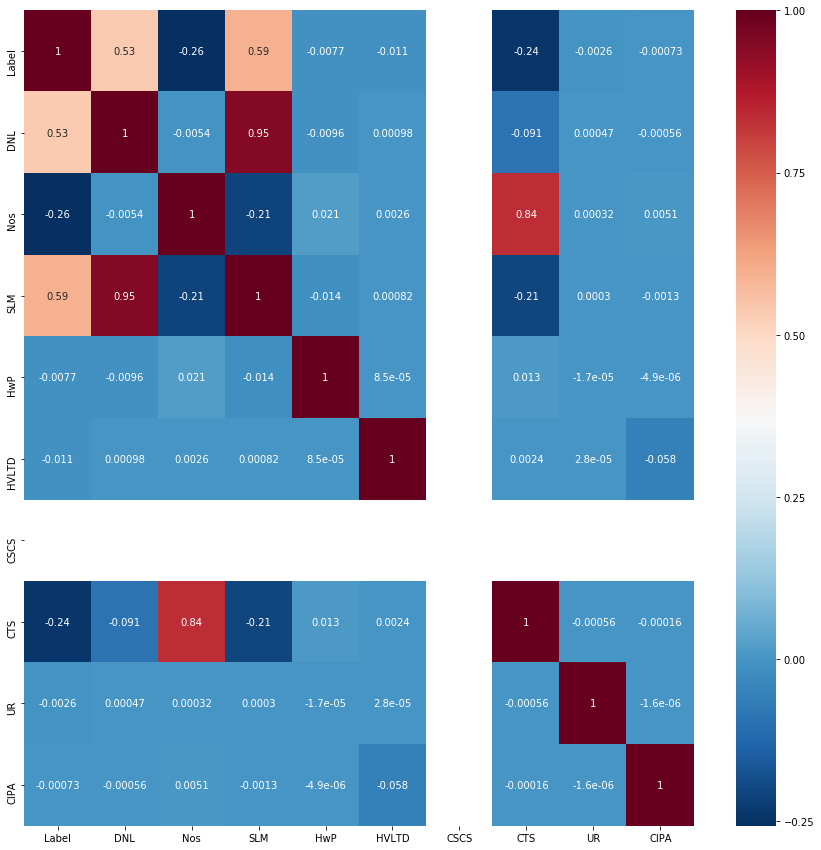

In [30]:

%matplotlib inline
plt.figure(figsize=(15,15))
sns.heatmap(df_domains.corr(), annot=True, cmap= "RdBu_r")

In [31]:
str1 = df_domains.iloc[0,0]
str1

'thocsagabardinedazyx.com'

In [32]:
t = str1.split('.')
t

['thocsagabardinedazyx', 'com']

In [33]:
findMinLengthOfList(t)

AttributeError: 'list' object has no attribute 'split'

In [ ]:
str1.split('.')[0] == 'www'

In [ ]:
test.head()